In [44]:
from keras.models import Sequential
from keras.layers import Conv2D,Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint
import numpy as np
import cv2
import pandas as pd
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Dense, Dropout, Activation, Flatten
import os
from keras.utils import np_utils
import glob
from keras import backend as K
from matplotlib import pyplot as plt
from scipy import misc
from scipy.ndimage import gaussian_filter
from matplotlib import pyplot as plt #for imshow
from matplotlib.collections import PatchCollection
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

In [25]:
def get_im(path):
    # Load as grayscale
    img = misc.imread(path, mode='RGB')
    img = gaussian_filter(img,sigma=10)
    #img = cv2.imread(path, 0)
    # Reduce size
    resized = cv2.resize(img, (512, 512))
    crop_img = resized[70:425, 70:425]
    #resized = cv2.GaussianBlur(resized,(5,5),0)
    return crop_img

def load_data(path1,label):
    X = []
    path = os.path.join('.', path1, '*.png')  
    files = glob.glob(path)
    #sorted(list(map(int, files)))
    for fl in files:
        #print ("Current File Being Processed is: " + fl)
        img = get_im(fl)
        X.append(img)
    Y = np.full(len(X), label)
    return X, Y

In [26]:
#FOR TRAIN DATA
                                    
train_data = [] 
train_data, train_target = load_data('Train\dmso',0)
train_data1, train_target1 = load_data('Train\cccp',1)
train_data2, train_target2 = load_data('Train\Apra',2)
train_data3, train_target3 = load_data('Train\corr',3)
print(len(train_data),len(train_data1),len(train_data2),len(train_data3))
print('Loaded train images')
train_data.extend(train_data1)
train_data.extend(train_data2)
train_data.extend(train_data3)
print('Size Training Data',len(train_data))
train_target = np.append(train_target, train_target1)
train_target = np.append(train_target, train_target2)
train_target = np.append(train_target, train_target3)
print('Size Training Target',train_target.shape)
train_data = np.array(train_data, dtype=np.uint8)     

#FOR VAL DATA
val_data = []
val_data, val_target = load_data('Val\dmso',0)
val_data1, val_target1 = load_data('Val\cccp',1)
val_data2, val_target2 = load_data('Val\Apra',2)
val_data3, val_target3 = load_data('Val\corr',3)
print(len(val_data),len(val_data1),len(val_data2),len(val_data3))
print('Loaded val images')
val_data.extend(val_data1)
val_data.extend(val_data2)
val_data.extend(val_data3)
print('Size Val Data',len(val_data))
val_target = np.append(val_target, val_target1)
val_target = np.append(val_target, val_target2)
val_target = np.append(val_target, val_target3)
print('Size Val Target',val_target.shape)
val_data = np.array(val_data, dtype=np.uint8)

#FOR TEST DATA
test_data = []
test_data, test_target = load_data('Test\dmso',0)
test_data1, test_target1 = load_data('Test\cccp',1)
test_data2, test_target2 = load_data('Test\Apra',2)
test_data3, test_target3 = load_data('Test\corr',3)
print(len(test_data),len(test_data1),len(test_data2),len(test_data3))
print('Loaded test images')
test_data.extend(test_data1)
test_data.extend(test_data2)
test_data.extend(test_data3)
print('Size Test Data',len(test_data))
test_target = np.append(test_target, test_target1)
test_target = np.append(test_target, test_target2)
test_target = np.append(test_target, test_target3)
print('Size Test Target',test_target.shape)
test_data = np.array(test_data, dtype=np.uint8)


C:\Users\nikon\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


492 121 119 4
Loaded train images
Size Training Data 736
Size Training Target (736,)
107 26 26 2
Loaded val images
Size Val Data 161
Size Val Target (161,)
105 26 26 2
Loaded test images
Size Test Data 159
Size Test Target (159,)


In [47]:
ntest_data = []
ntest_data,temp = load_data('drugScreen_testSet',0)
print(len(ntest_data))


C:\Users\nikon\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


200


In [27]:
test_target = np_utils.to_categorical(test_target, 4)
val_target = np_utils.to_categorical(val_target, 4)
train_target = np_utils.to_categorical(train_target, 4)
X_train = train_data
Y_train = train_target
X_val = val_data
Y_val = val_target
X_test = test_data
Y_test = test_target

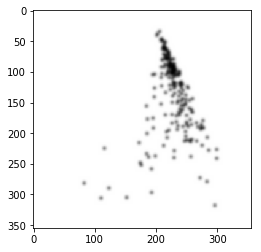

In [28]:
plt.imshow(train_data1[0])
plt.show()

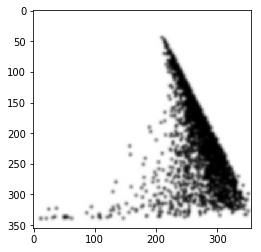

In [29]:
plt.imshow(X_train[6])
plt.show()

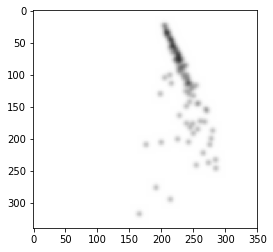

In [57]:
plt.imshow(X_train[78])
plt.show()

In [30]:
# 7. Define model architecture
model = Sequential()

model.add(Conv2D(32, 3, 3, activation='relu', input_shape=(355, 355, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(130, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax',kernel_initializer='uniform'))
 
#opt = SGD(0.0025)
# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
# 9. Fit model on training data
#cb = [EarlyStopping(monitor = 'val_loss', patience = 20)]
filepath = "model_CNN_WELL-{epoch:02d}--{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc',verbose=1,save_best_only=True,mode='max')
cb = [checkpoint]
h = model.fit(X_train, Y_train, 
          batch_size=16, nb_epoch=60, verbose=1, validation_data = (X_val,Y_val),
             callbacks = cb)
 
#10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test accuarcy:', str(score))

# 11. Predicted labels
predictions = model.predict([X_test])
#print('Prediction shape:', predictions.shape)
#print("Prediction: %s" % str(predictions[0:5]))
#print("Target: %s" % str(Y_test[0:5]))  # only show first 2 probas

real_labels = np.argmax(Y_test, axis=1)
p_labels = np.argmax(predictions, axis=1)

print('Recognition Rate:', 100*float(sum(real_labels == p_labels))/float(len(p_labels)))

plt.figure(1, figsize=(9,9))
plt.suptitle('130 Dense, Epoch - 40, EarlyCallback Patience 15, kernel - 5 X 5, Dropout - 0.5, Optimizer - Adam, batchsize - 25, BNorm', fontsize = 15)
plt.subplot(211)  
plt.plot(h.history['acc'], linewidth = 1.0)  
plt.plot(h.history['val_acc'], linewidth = 1.0)  
plt.title('Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'test'], loc='best') 

plt.subplot(212)  
plt.plot(h.history['loss'], linewidth = 1.0)  
plt.plot(h.history['val_loss'], linewidth = 1.0)  
plt.title('Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'test'], loc='best')  
plt.show() 


C:\Users\nikon\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(355, 355,...)`
  after removing the cwd from sys.path.
C:\Users\nikon\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
C:\Users\nikon\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:29: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 736 samples, validate on 161 samples
Epoch 1/60
736/736 [==============================] - 19s 26ms/step - loss: 1.5331 - acc: 0.7255 - val_loss: 4.6607 - val_acc: 0.6646

Epoch 00001: val_acc improved from -inf to 0.66460, saving model to model_CNN_WELL-01--0.66.hdf5
Epoch 2/60
736/736 [==============================] - 13s 18ms/step - loss: 0.5889 - acc: 0.8505 - val_loss: 0.4454 - val_acc: 0.8571

Epoch 00002: val_acc improved from 0.66460 to 0.85714, saving model to model_CNN_WELL-02--0.86.hdf5
Epoch 3/60
736/736 [==============================] - 13s 18ms/step - loss: 0.6161 - acc: 0.8668 - val_loss: 0.3722 - val_acc: 0.8882

Epoch 00003: val_acc improved from 0.85714 to 0.88820, saving model to model_CNN_WELL-03--0.89.hdf5
Epoch 4/60
736/736 [==============================] - 13s 18ms/step - loss: 0.5203 - acc: 0.8736 - val_loss: 5.4061 - val_acc: 0.6646

Epoch 00004: val_acc did not improve from 0.88820
Epoch 5/60
736/736 [==============================] - 13s 18ms/step

KeyboardInterrupt: 

In [31]:
model = load_model('model_CNN_WELL-03--0.89.hdf5')

In [48]:

predictions2 = model.predict([ntest_data])
#print('Prediction shape:', predictions.shape)
#print("Prediction: %s" % str(predictions[0:5]))
#print("Target: %s" % str(Y_test[0:5]))  # only show first 2 probas

real_labels = np.argmax(Y_test, axis=1)
p_labels = np.argmax(predictions1, axis=1)


In [34]:

print('Recognition Rate:', 100*float(sum(real_labels == p_labels))/float(len(p_labels)))


Recognition Rate: 89.937106918239


In [72]:
#prediction1 is for test data and 2 for drug screen test data(200)
dmso = []
cccp = []
apramycin = []
for i in range(0,159):
    dmso.append(predictions1[i][0])
    cccp.append(predictions1[i][1])
    apramycin.append(predictions1[i][2])
alldrug_pd = pd.DataFrame(data = predictions1)
alldrug_pd = pd.DataFrame(data = alldrug_pd.drop(columns = 3))
dmso_pd = pd.DataFrame(data= dmso)
cccp_pd = pd.DataFrame(data = cccp)
apra_pd = pd.DataFrame(data = apramycin)


In [71]:
#Confidence for all DMSO, CCCP, Apramycin Wells
print('** FOR DMSO WELLS ** \nMean - DMSO: {0}, CCCP: {1}, Apramycin: {2}, \nStd - DMSO: {3}, CCCP: {4}, Apramycin: {5} '.format( \
                                                                np.mean(dmso_pd[0].iloc[idx_dmso].values),\
                                                                np.mean(cccp_pd[0].iloc[idx_dmso].values),\
                                                                np.mean(apra_pd[0].iloc[idx_dmso].values),\
                                                                np.std(dmso_pd[0].iloc[idx_dmso].values), \
                                                                np.std(cccp_pd[0].iloc[idx_dmso].values), \
                                                                np.std(apra_pd[0].iloc[idx_dmso].values)))

print('\n** FOR CCCP WELLS ** \nMean - DMSO: {0}, CCCP: {1}, Apramycin: {2}, \nStd - DMSO: {3}, CCCP: {4}, Apramycin: {5} '.format( \
                                                                np.mean(dmso_pd[0].iloc[idx_cccp].values),\
                                                                np.mean(cccp_pd[0].iloc[idx_cccp].values),\
                                                                np.mean(apra_pd[0].iloc[idx_cccp].values),\
                                                                np.std(dmso_pd[0].iloc[idx_cccp].values), \
                                                                np.std(cccp_pd[0].iloc[idx_cccp].values), \
                                                                np.std(apra_pd[0].iloc[idx_cccp].values)))

print('\n** FOR APRA WELLS ** \nMean - DMSO: {0}, CCCP: {1}, Apramycin: {2}, \nStd - DMSO: {3}, CCCP: {4}, Apramycin: {5} '.format( \
                                                                np.mean(dmso_pd[0].iloc[idx_apramycin].values),\
                                                                np.mean(cccp_pd[0].iloc[idx_apramycin].values),\
                                                                np.mean(apra_pd[0].iloc[idx_apramycin].values),\
                                                                np.std(dmso_pd[0].iloc[idx_apramycin].values), \
                                                                np.std(cccp_pd[0].iloc[idx_apramycin].values), \
                                                                np.std(apra_pd[0].iloc[idx_apramycin].values)))

** FOR DMSO WELLS ** 
Mean - DMSO: 0.9088571600615978, CCCP: 0.08072087171498195, Apramycin: 0.00997783241449283, 
Std - DMSO: 0.1861163861746943, CCCP: 0.18141719031320772, Apramycin: 0.026791056639174294 

** FOR CCCP WELLS ** 
Mean - DMSO: 0.19758418696269822, CCCP: 0.8015430012733606, Apramycin: 0.000745988960319925, 
Std - DMSO: 0.3332042045181627, CCCP: 0.3339333490202995, Apramycin: 0.003002182572859915 

** FOR APRA WELLS ** 
Mean - DMSO: 0.1670417089165382, CCCP: 0.02014326320156224, Apramycin: 0.7995108377475005, 
Std - DMSO: 0.17315600353686286, CCCP: 0.02295860600862592, Apramycin: 0.19838802786830476 


In [69]:
dmso = []
cccp = []
apramycin = []
for i in range(0,200):
    dmso.append(predictions2[i][0])
    cccp.append(predictions2[i][1])
    apramycin.append(predictions2[i][2])

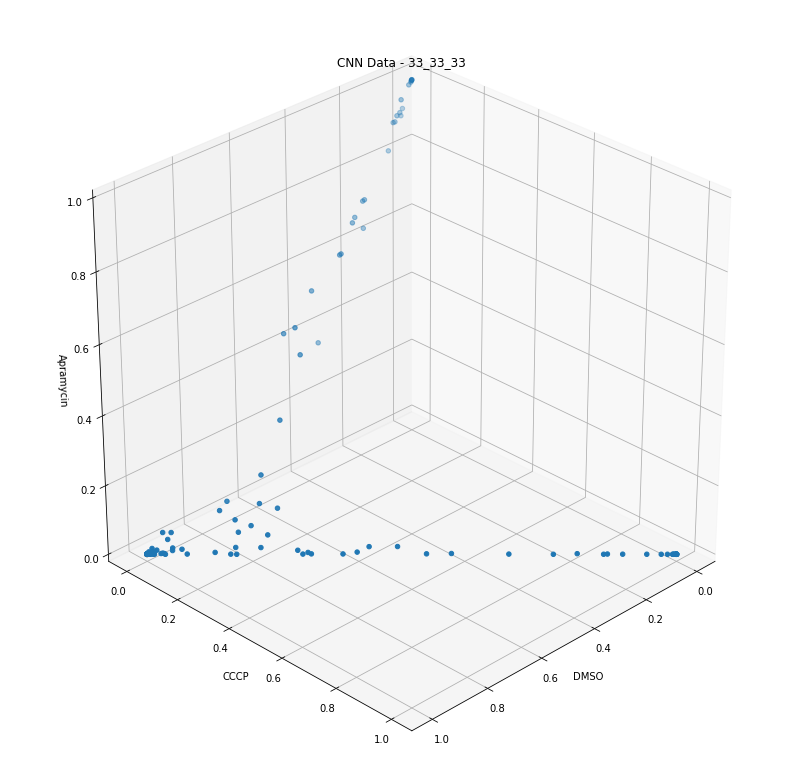

In [45]:
%matplotlib inline
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dmso,cccp,apramycin)
ax.set_zlim3d(0,1.0)
#ax.set_ylim3d(0.6,1.0)
ax.set_xlabel('DMSO')
ax.set_ylabel('CCCP')
ax.set_zlabel('Apramycin')
#plt.legend()
ax.view_init(30,45)
plt.title("CNN Data - 33_33_33")
plt.draw()
#plt.savefig('geomean.png',dpi=500)
plt.show()

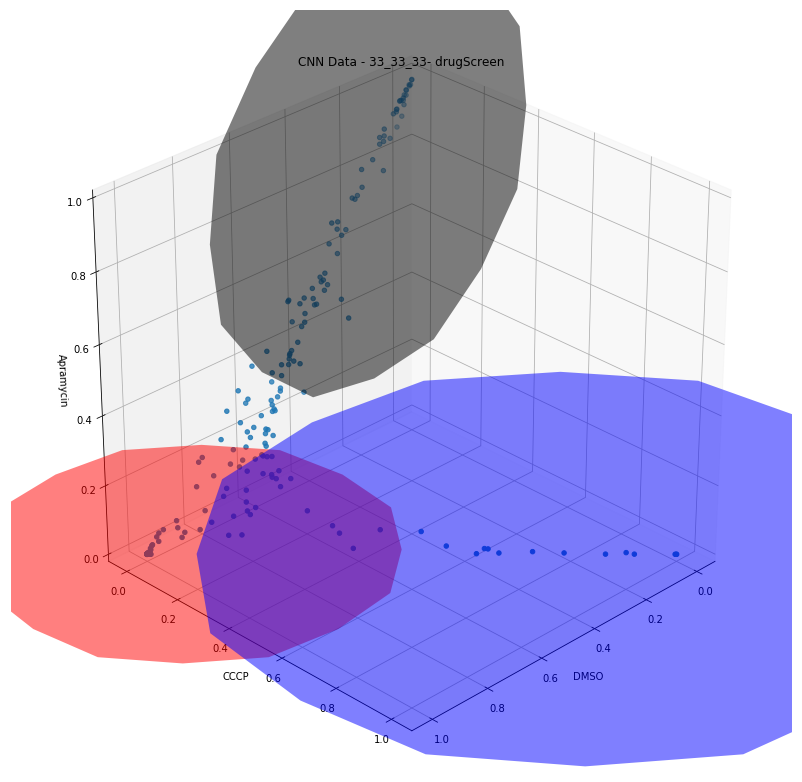

In [70]:
%matplotlib inline
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dmso,cccp,apramycin)
       
# #For DMSO
circle = Circle((np.mean(dmso_pd[0].iloc[idx_dmso].values),np.mean(cccp_pd[0].iloc[idx_dmso].values)),np.std(dmso_pd[0].iloc[idx_dmso].values)*3,alpha = .5, facecolor = 'r')
ax.add_patch(circle)
art3d.patch_2d_to_3d(circle,z=np.mean(apra_pd[0].iloc[idx_dmso].values),zdir="z")

# #For CCCP
circle = Circle((np.mean(dmso_pd[0].iloc[idx_cccp].values),np.mean(cccp_pd[0].iloc[idx_cccp].values)),np.std(cccp_pd[0].iloc[idx_cccp].values)*3,alpha = .5, facecolor = 'b')
ax.add_patch(circle)
art3d.patch_2d_to_3d(circle,z=np.mean(apra_pd[0].iloc[idx_cccp].values),zdir="z")

# #For Apramycin
circle = Circle((np.mean(dmso_pd[0].iloc[idx_apramycin].values),np.mean(apra_pd[0].iloc[idx_apramycin].values)),np.std(apra_pd[0].iloc[idx_apramycin].values)*3  ,alpha = .5, facecolor = 'k')
ax.add_patch(circle)
art3d.patch_2d_to_3d(circle,z=np.mean(cccp_pd[0].iloc[idx_apramycin].values),zdir="y")

ax.set_zlim3d(0,1.0)
#ax.set_ylim3d(0.6,1.0)
ax.set_xlabel('DMSO')
ax.set_ylabel('CCCP')
ax.set_zlabel('Apramycin')
#plt.legend()
ax.view_init(30,45)
plt.title("CNN Data - 33_33_33- drugScreen")
plt.draw()
#plt.savefig('geomean.png',dpi=500)
plt.show()

In [61]:
idx_dmso = np.arange(0,105)
idx_cccp = np.arange(105,131)
idx_apramycin = np.arange(131,157)

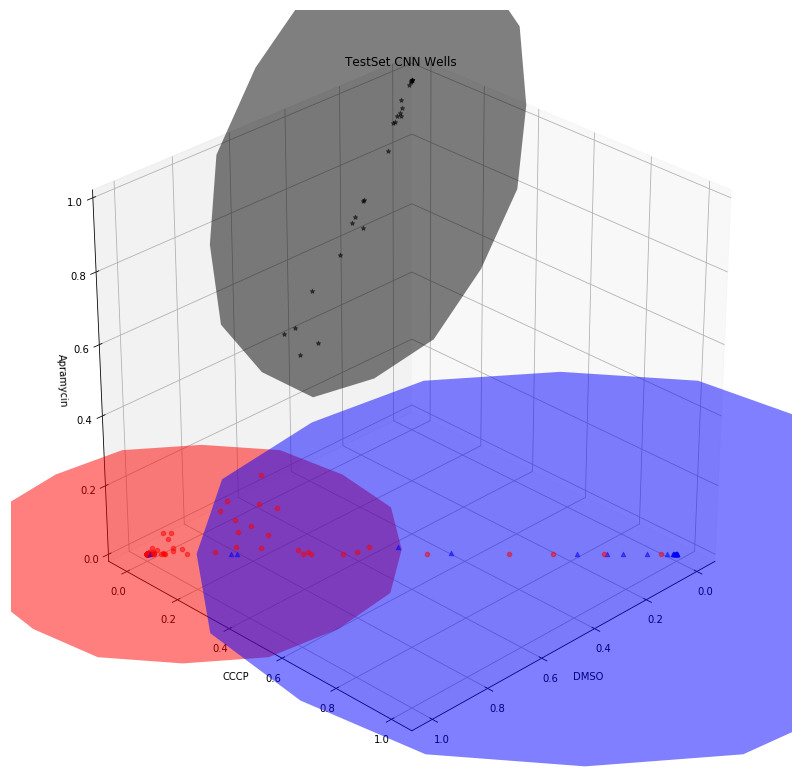

In [68]:
%matplotlib inline
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111, projection='3d')

area = np.full(96,(20))

for i in range(0, len(alldrug_pd.iloc[idx_dmso].values.tolist())):
    for c, m, in [('r', 'o')]:
        ax.scatter(alldrug_pd.iloc[idx_dmso].values.tolist()[i][0], \
                   alldrug_pd.iloc[idx_dmso].values.tolist()[i][1], \
                   alldrug_pd.iloc[idx_dmso].values.tolist()[i][2], zdir=dmso,c=c,marker =m ,alpha=0.5, label="DMSO" if i == 0 else "")
        
for i in range(0, len(alldrug_pd.iloc[idx_cccp].values.tolist())):
    for c, m, in [('b', '^')]:
        ax.scatter(alldrug_pd.iloc[idx_cccp].values.tolist()[i][0], \
                   alldrug_pd.iloc[idx_cccp].values.tolist()[i][1], \
                   alldrug_pd.iloc[idx_cccp].values.tolist()[i][2], zdir=dmso,c=c,marker =m,alpha=0.5, label="CCCP" if i == 0 else "")
        
for i in range(0, len(alldrug_pd.iloc[idx_apramycin].values.tolist())):
    for c, m, in [('k', '*')]:
        ax.scatter(alldrug_pd.iloc[idx_apramycin].values.tolist()[i][0], \
                   alldrug_pd.iloc[idx_apramycin].values.tolist()[i][1], \
                   alldrug_pd.iloc[idx_apramycin].values.tolist()[i][2], zdir=dmso,c=c,marker =m,alpha=0.5, label="Apramycin" if i == 0 else "")

        
# #For DMSO
circle = Circle((np.mean(dmso_pd[0].iloc[idx_dmso].values),np.mean(cccp_pd[0].iloc[idx_dmso].values)),np.std(dmso_pd[0].iloc[idx_dmso].values)*3,alpha = .5, facecolor = 'r')
ax.add_patch(circle)
art3d.patch_2d_to_3d(circle,z=np.mean(apra_pd[0].iloc[idx_dmso].values),zdir="z")

# #For CCCP
circle = Circle((np.mean(dmso_pd[0].iloc[idx_cccp].values),np.mean(cccp_pd[0].iloc[idx_cccp].values)),np.std(cccp_pd[0].iloc[idx_cccp].values)*3,alpha = .5, facecolor = 'b')
ax.add_patch(circle)
art3d.patch_2d_to_3d(circle,z=np.mean(apra_pd[0].iloc[idx_cccp].values),zdir="z")

# #For Apramycin
circle = Circle((np.mean(dmso_pd[0].iloc[idx_apramycin].values),np.mean(apra_pd[0].iloc[idx_apramycin].values)),np.std(apra_pd[0].iloc[idx_apramycin].values)*3  ,alpha = .5, facecolor = 'k')
ax.add_patch(circle)
art3d.patch_2d_to_3d(circle,z=np.mean(cccp_pd[0].iloc[idx_apramycin].values),zdir="y")

# well_number = np.arange(1,3074)
# classes = ['DMSO','CCCP','Apramycin']
# class_colours = ['r','b','k']
# recs = []
# for i in range(0,len(class_colours)):
#     recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
# plt.legend(recs,classes,loc=1)
# count1 = 0
# for i,j,k in zip(dmso,cccp,apramycin):
#     ax.text(i, j, k, str(well_number[count1]))
#     count1+=1
    #ax.annotate(str(well_number[count1]),xy=(i,j,k))
    
ax.set_zlim3d(0,1.0)
#ax.set_ylim3d(0.6,1.0)
ax.set_xlabel('DMSO')
ax.set_ylabel('CCCP')
ax.set_zlabel('Apramycin')
#plt.legend()
ax.view_init(30,45)
plt.title("TestSet CNN Wells")
plt.draw()
#plt.savefig('geomean.png',dpi=500)
plt.show()

In [82]:
np.sqrt(np.subtract(dmso,0.3333)**2 + np.subtract(cccp,0.3333)**2 + np.subtract(apramycin,0.3333)**2)

array([0.81649655, 0.81649655, 0.81649655, 0.49312145, 0.8142032 ,
       0.8161942 , 0.81649655, 0.8145369 , 0.81649655, 0.45215994,
       0.52597004, 0.4282989 , 0.50112486, 0.5615526 , 0.48301262,
       0.40500912, 0.40897894, 0.4469599 , 0.46133217, 0.7810036 ,
       0.48764002, 0.5561954 , 0.5008569 , 0.6547622 , 0.5444911 ,
       0.5703595 , 0.7885987 , 0.81649655, 0.8114375 , 0.81649137,
       0.81649655, 0.81649655, 0.81638753, 0.81649655, 0.81649655,
       0.81649655, 0.8137213 , 0.81649584, 0.59292936, 0.8164952 ,
       0.8151239 , 0.5640802 , 0.8001026 , 0.81649655, 0.81649655,
       0.81649655, 0.48957336, 0.7832507 , 0.66236395, 0.7300854 ,
       0.58166796, 0.81649643, 0.61137784, 0.81649655, 0.81649655,
       0.81649655, 0.8138835 , 0.81649655, 0.81649643, 0.7982532 ,
       0.74940974, 0.8120933 , 0.7993264 , 0.8141343 , 0.81119144,
       0.81649655, 0.77861875, 0.8162727 , 0.8160215 , 0.81649613,
       0.7757526 , 0.7743019 , 0.8164957 , 0.81649613, 0.81645